In [53]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [5]:
# Load the dataset with specified encoding
data = pd.read_csv("spam.csv", encoding='latin-1')

# Exploratory Data Analysis (EDA)

In [6]:
print("Dataset Info:")
print(data.info())
print("\nClass Distribution:")
print(data['v1'].value_counts())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB
None

Class Distribution:
v1
ham     4825
spam     747
Name: count, dtype: int64


In [7]:
# Check for null values
null_values = data.isnull().sum()

In [26]:
# Display null values
print("Null values in each column:")
print(null_values)

Null values in each column:
v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64


In [25]:
#Drop irrelevant columns and rename columns
data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1, inplace=True)
data.rename(columns={'v1':'Target','v2':'Text'}, inplace=True)

In [27]:
data.head()

Target                                               Text  message_length
0       0  Go until jurong point, crazy.. Available only ...             111
1       0                      Ok lar... Joking wif u oni...              29
2       1  Free entry in 2 a wkly comp to win FA Cup fina...             155
3       0  U dun say so early hor... U c already then say...              49
4       0  Nah I don't think he goes to usf, he lives aro...              61

In [29]:
# Check for null values
null_values = data.isnull().sum()
# Display null values
print("Null values in each column:")
print(null_values)

Null values in each column:
Target            0
Text              0
message_length    0
dtype: int64


#Data Preprocessing

Data Cleaning

In [30]:
print(data["Text"][:10])

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
5    FreeMsg Hey there darling it's been 3 week's n...
6    Even my brother is not like to speak with me. ...
7    As per your request 'Melle Melle (Oru Minnamin...
8    WINNER!! As a valued network customer you have...
9    Had your mobile 11 months or more? U R entitle...
Name: Text, dtype: object


In [33]:
def clean(text):
    sms= re.sub('[^a-zA-Z]', " ", text)
    sms=sms.lower()

    #remove extra whitespaces
    sms= sms.split()
    sms= ' '.join(sms)
    return sms

data["Cleaned_text"]=data["Text"].apply(clean)

In [34]:
print(data["Cleaned_text"][:10])

0    go until jurong point crazy available only in ...
1                              ok lar joking wif u oni
2    free entry in a wkly comp to win fa cup final ...
3          u dun say so early hor u c already then say
4    nah i don t think he goes to usf he lives arou...
5    freemsg hey there darling it s been week s now...
6    even my brother is not like to speak with me t...
7    as per your request melle melle oru minnaminun...
8    winner as a valued network customer you have b...
9    had your mobile months or more u r entitled to...
Name: Cleaned_text, dtype: object


Remove Stopwords

In [40]:
# Tokenization function
def tokenize(text):
    return word_tokenize(text)



In [43]:
# Apply tokenization to create a new column
data['Tokenized_text'] = data['Text'].apply(tokenize)

In [45]:
# Stopword removal function
def remove_stopwords(text):
    stop_words = set(stopwords.words("english"))
    filtered_text = [word for word in text if word.lower() not in stop_words]
    return filtered_text

In [49]:
# directory
nltk.data.path.append("D:/nltk_data")

In [50]:
# Now try to download stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [51]:
data["Nostopword_text"] = data["Tokenized_text"].apply(remove_stopwords)

In [52]:
print(data["Nostopword_text"][:10])

0    [Go, jurong, point, ,, crazy, .., Available, b...
1             [Ok, lar, ..., Joking, wif, u, oni, ...]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3    [U, dun, say, early, hor, ..., U, c, already, ...
4    [Nah, n't, think, goes, usf, ,, lives, around,...
5    [FreeMsg, Hey, darling, 's, 3, week, 's, word,...
6    [Even, brother, like, speak, ., treat, like, a...
7    [per, request, 'Melle, Melle, (, Oru, Minnamin...
8    [WINNER, !, !, valued, network, customer, sele...
9    [mobile, 11, months, ?, U, R, entitled, Update...
Name: Nostopword_text, dtype: object


# Visualization

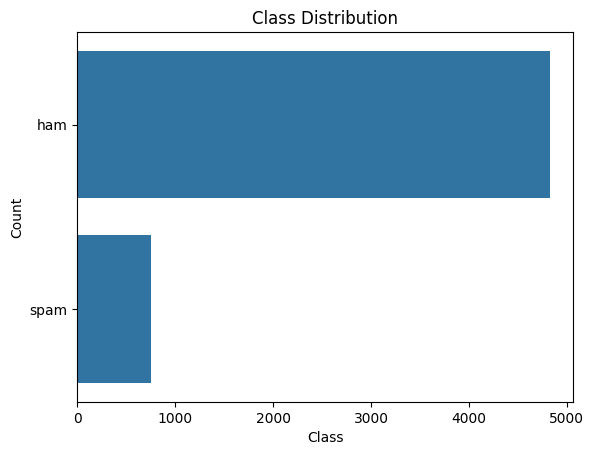

In [9]:
# Visualization
sns.countplot(data['v1'])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

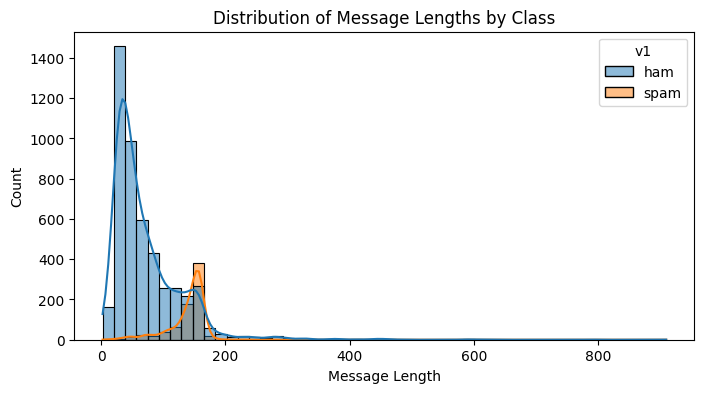

In [11]:
# Add a new column for message lengths
data['message_length'] = data['v2'].apply(len)

# Plot histogram of message lengths
plt.figure(figsize=(8, 4))
sns.histplot(data=data, x='message_length', hue='v1', bins=50, kde=True)
plt.title('Distribution of Message Lengths by Class')
plt.xlabel('Message Length')
plt.ylabel('Count')
plt.show()

spam_wordcloud

In [12]:
from wordcloud import WordCloud

In [13]:
# Generate word cloud for spam messages
spam_text = ' '.join(data[data['v1'] == 'spam']['v2'])
spam_wordcloud = WordCloud(width=800, height=400).generate(spam_text)

In [14]:
# Generate word cloud for ham messages
ham_text = ' '.join(data[data['v1'] == 'ham']['v2'])
ham_wordcloud = WordCloud(width=800, height=400).generate(ham_text)

(-0.5, 799.5, 399.5, -0.5)

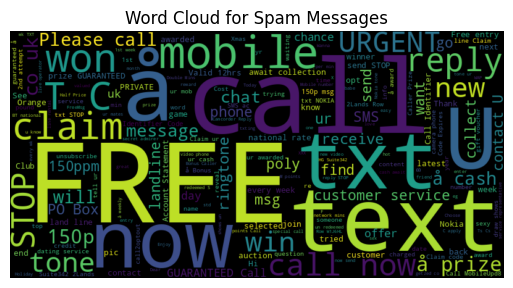

In [16]:
# Plot word clouds
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Spam Messages')
plt.axis('off')



(-0.5, 799.5, 399.5, -0.5)

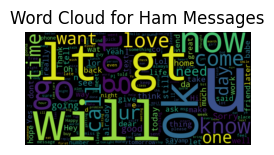

In [17]:
plt.subplot(1, 2, 2)
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Ham Messages')
plt.axis('off')

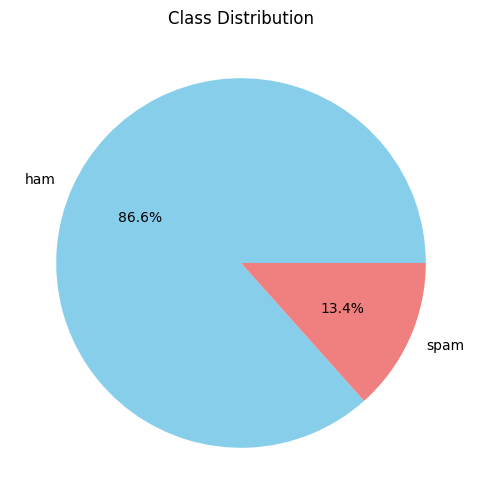

In [18]:
# Plot pie chart for class distribution
plt.figure(figsize=(8, 6))
data['v1'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Class Distribution')
plt.ylabel('')
plt.show()

In [19]:
# Model fitting
# Converting text labels to numerical labels
data['v1'] = data['v1'].map({'ham': 0, 'spam': 1})

In [20]:
# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data['v2'], data['v1'], test_size=0.2, random_state=42)


In [21]:
# Feature extraction using CountVectorizer
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [22]:
# Fitting the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [23]:
# Predictions
y_pred = nb_classifier.predict(X_test)

In [77]:
# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
print("\nModel Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Model Accuracy: 0.9838565022421525

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.99      0.89      0.94       150

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [55]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

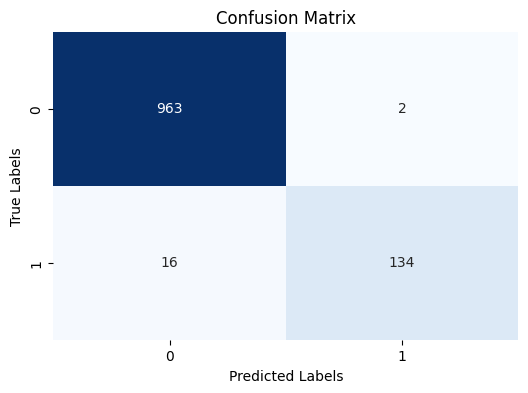

In [57]:
# Plotting the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Support Vector Machine (SVM)

In [58]:
# Fitting the SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [59]:
# Predictions
y_pred_svm = svm_classifier.predict(X_test)

In [60]:
# Model evaluation
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("\nSVM Model Accuracy:", accuracy_svm)
print("\nSVM Classification Report:")
print(classification_report(y_test, y_pred_svm))


SVM Model Accuracy: 0.979372197309417

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.97      0.87      0.92       150

    accuracy                           0.98      1115
   macro avg       0.98      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



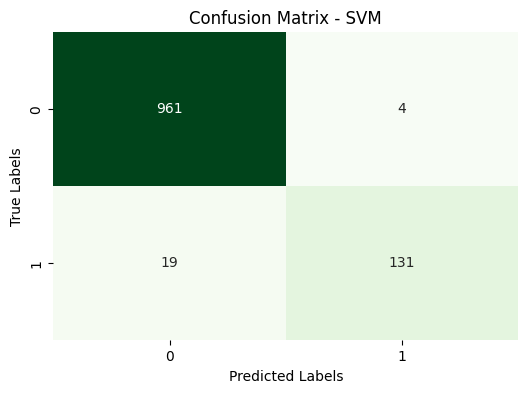

In [65]:
# Plotting the confusion matrix for SVM
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Random Forest

In [61]:
# Fitting the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [62]:
# Predictions
y_pred_rf = rf_classifier.predict(X_test)

In [63]:
# Model evaluation
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("\nRandom Forest Model Accuracy:", accuracy_rf)
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Model Accuracy: 0.9757847533632287

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       965
           1       1.00      0.82      0.90       150

    accuracy                           0.98      1115
   macro avg       0.99      0.91      0.94      1115
weighted avg       0.98      0.98      0.97      1115



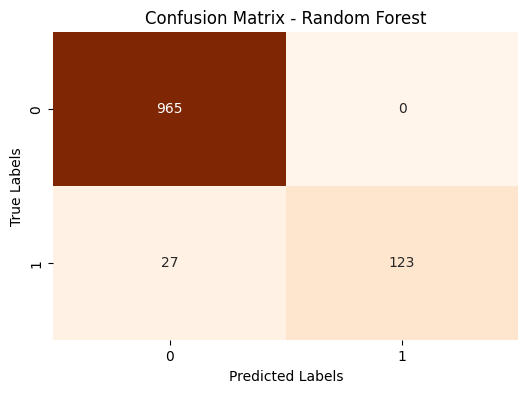

In [66]:
# Plotting the confusion matrix for Random Forest
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [70]:
# Model names
models = ['Naive Bayes', 'SVM', 'Random Forest']



In [71]:
# Model accuracies
accuracies = [accuracy, accuracy_svm, accuracy_rf]



In [72]:
# Create a DataFrame for the comparison table
comparison_df = pd.DataFrame({'Model': models, 'Accuracy': accuracies})



In [73]:
# Display the comparison table
print(comparison_df)



           Model  Accuracy
0    Naive Bayes  0.983857
1            SVM  0.979372
2  Random Forest  0.975785


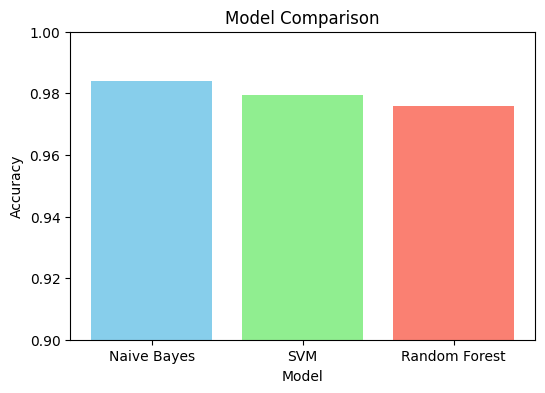

In [76]:
# Plotting the comparison table
plt.figure(figsize=(6, 4))
plt.bar(models, accuracies, color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Model Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0.9, 1.0)  # Set y-axis limit for better visualization
plt.show()

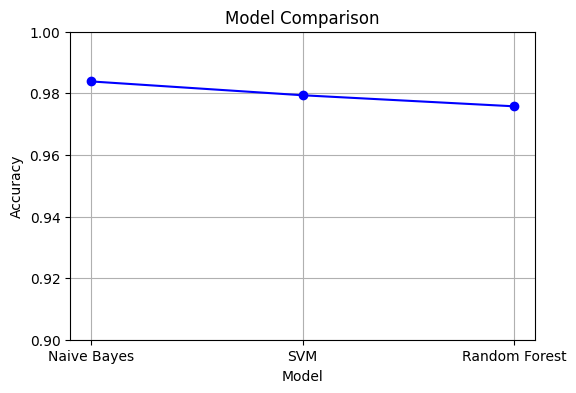

In [75]:
# Plotting the comparison line plot
plt.figure(figsize=(6, 4))
plt.plot(models, accuracies, marker='o', color='b', linestyle='-')
plt.title('Model Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0.9, 1.0)  # Set y-axis limit for better visualization
plt.grid(True)
plt.show()